## Exercise 7 - Solution

In [5]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,4]

### Using matplotlib

In [3]:
PATH='data/rossmann'
sales_df = pd.read_csv(f'{PATH}/sales.csv', dtype={'StateHoliday':np.object}, parse_dates=['Date'])

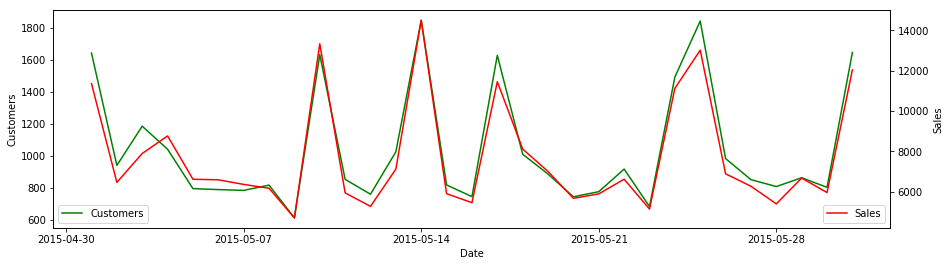

In [18]:
# Plot sales and customers of one store, limit time range to 1 month
data = sales_df.query('Store==85 and Date>="2015-05-01" and Date<="2015-05-31"')

plt.xlabel("Date")

plt.ylabel("Customers")
plt.plot(data['Date'], data['Customers'], color='green', label='Customers')
plt.legend(loc='lower left')

ax2 = plt.twinx()
ax2.plot(data['Date'], data['Sales'], color='red', label='Sales')
ax2.set_ylabel('Sales')
ax2.legend(loc='lower right');

In [7]:
# data.plot()
data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
68099,85,7,2015-05-31,12040,1647,1,0,0,0
69214,85,6,2015-05-30,5958,804,1,0,0,0
70329,85,5,2015-05-29,6678,864,1,0,0,0
71444,85,4,2015-05-28,5399,809,1,0,0,0
72559,85,3,2015-05-27,6272,852,1,0,0,0


### Load the seaborn dataset 'tips', calculate the tip percentage

In [8]:
# Load Seaborn example data set 'tips' and calculate tip percentage
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069
5,25.29,4.71,Male,No,Sun,Dinner,4,0.228863
6,8.77,2.00,Male,No,Sun,Dinner,2,0.295421
7,26.88,3.12,Male,No,Sun,Dinner,4,0.131313
8,15.04,1.96,Male,No,Sun,Dinner,2,0.149847
9,14.78,3.23,Male,No,Sun,Dinner,2,0.279654


### Plot a bar chart with the average tip percentage per day

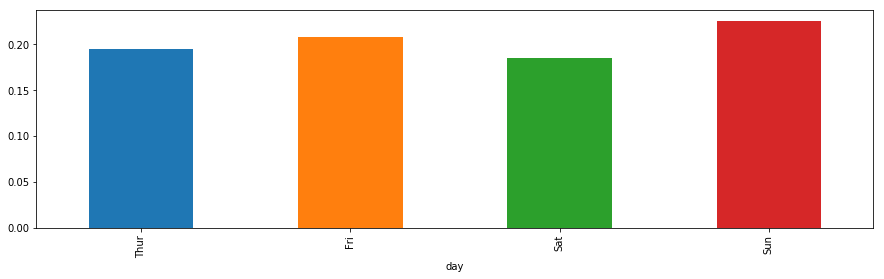

In [9]:
# using Pandas plot
tips.groupby('day')['tip_pct'].mean().plot.bar();

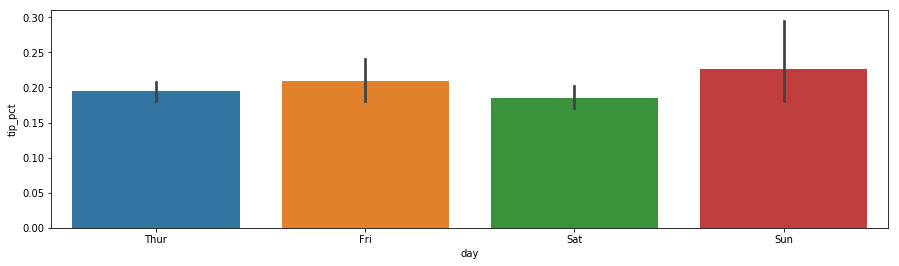

In [10]:
# using Seaborn (including confidence interval)
sns.barplot(x='day', y='tip_pct', data=tips);

### Histogram of the tip percentage

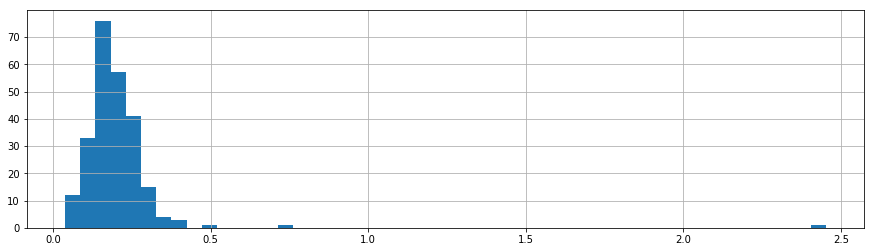

In [11]:
# using Pandas plot
tips['tip_pct'].hist(bins=50);

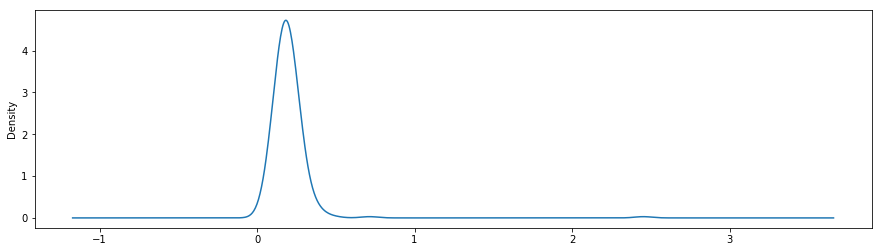

In [12]:
# Densitiy plot of the tip percentage, using Pandas plot
tips['tip_pct'].plot.density();

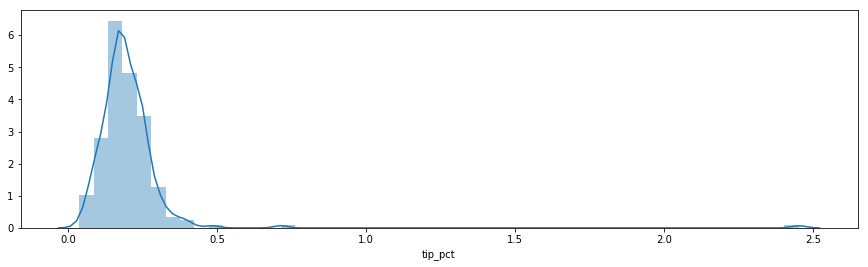

In [13]:
# Combinded histogram and density plot of the tip percentage, using Seaborn distplot
sns.distplot(tips['tip_pct'], bins=50);

### Draw boxplot and violin plots of the total bill per day

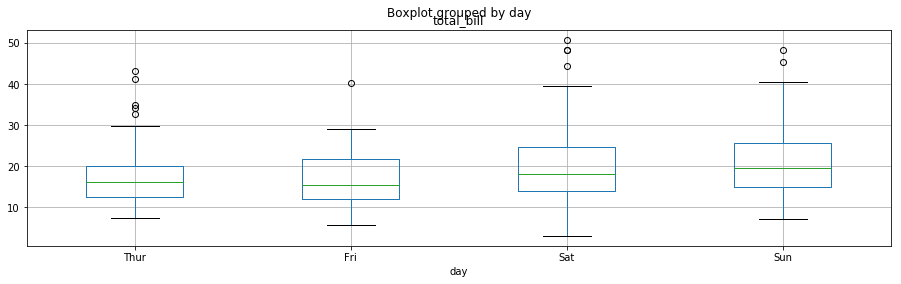

In [14]:
# Boxplot of the total bill, using Pandas plot
tips.boxplot(column=['total_bill'], by='day');

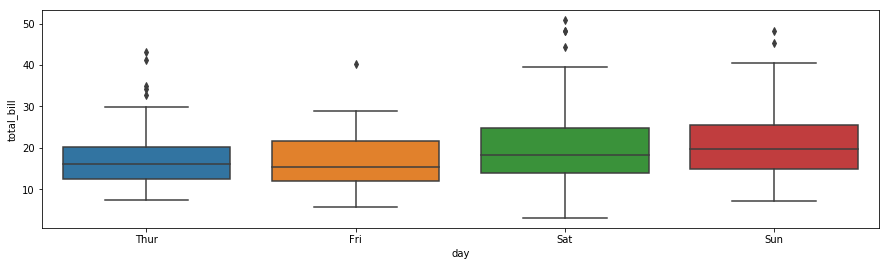

In [15]:
# Boxplot of the total bill, using Seaborn
sns.boxplot(x='day', y='total_bill', data=tips);

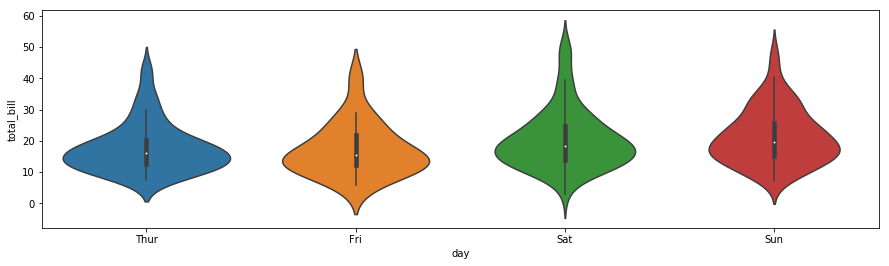

In [16]:
# Boxplot of the total bill, using Seaborn
sns.violinplot(x='day', y='total_bill', data=tips);